In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [25]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 16})

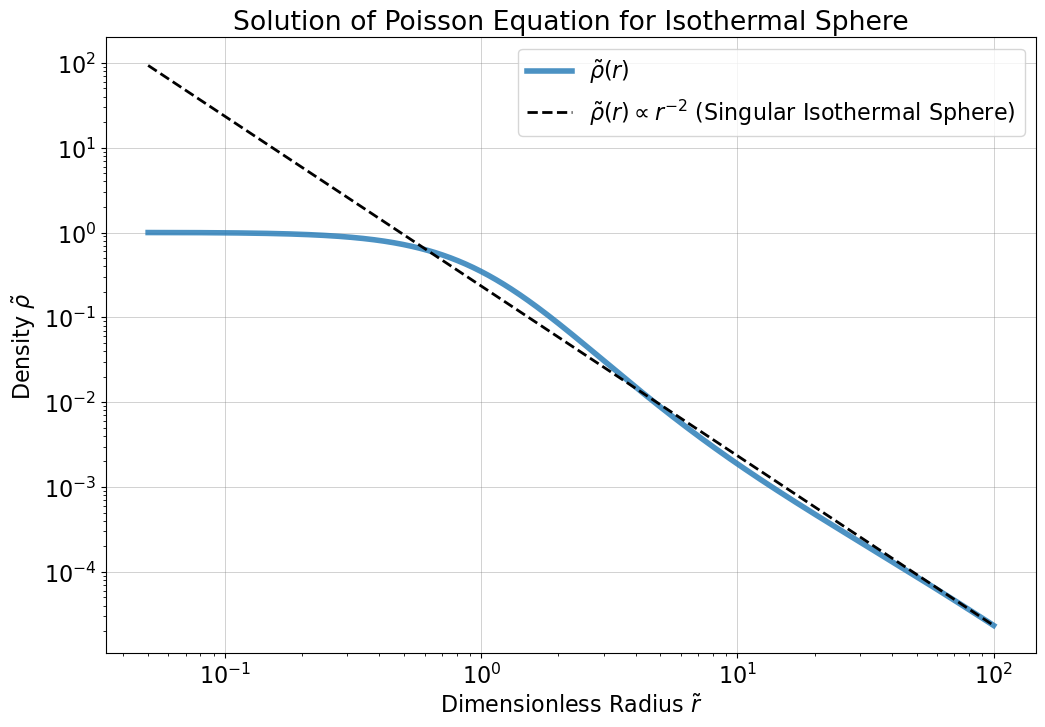

In [57]:
# Define the Poisson equation in terms of dimensionless variables
def poisson_eqn(r, y):
    """
    y[0] = ln(tilde_rho)
    y[1] = d(ln(tilde_rho))/dr
    """
    ln_tilde_rho, dln_tilde_rho_dr = y
    d2ln_tilde_rho_dr2 = -9 * np.exp(ln_tilde_rho) - 2 * dln_tilde_rho_dr / r
    return [dln_tilde_rho_dr, d2ln_tilde_rho_dr2]

# Boundary conditions
ln_tilde_rho_0 = np.log(1)  # ln(tilde_rho) at r=0
dln_tilde_rho_dr_0 = 0      # d(ln(tilde_rho))/dr at r=0

# Initial conditions for integration
r_initial = 5e-2  # Avoid division by zero
r_final = 100      # Maximum radius for integration
y_initial = [ln_tilde_rho_0, dln_tilde_rho_dr_0]

# Radius values for numerical integration
r_values = np.logspace(np.log10(r_initial), np.log10(r_final), 1000)

# Solve the Poisson equation
solution = solve_ivp(poisson_eqn, [r_values[0], r_values[-1]], y_initial, t_eval=r_values, method='RK45')

# Extract results
r = solution.t
ln_tilde_rho = solution.y[0]
tilde_rho = np.exp(ln_tilde_rho)

# Define the singular isothermal sphere density profile for comparison
def singular_isothermal_density(r):
    return 1 / r**2

# Compute scaling factor to match density values of the numerical solution and SIS at r_final
scaling_factor = tilde_rho[-1] / singular_isothermal_density(r[-1])

# Compute the singular isothermal sphere density
tilde_rho_singular = singular_isothermal_density(r)  * scaling_factor

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(r, tilde_rho, label=r'$\tilde{\rho}(r)$', linewidth=4, color='tab:blue', alpha=0.8)

# Singular isothermal sphere
plt.plot(r, tilde_rho_singular, label=r'$\tilde{\rho}(r) \propto r^{-2}$ (Singular Isothermal Sphere)', 
         linestyle='--', linewidth=2, color='black')

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'Dimensionless Radius $\tilde{r}$')
plt.ylabel(r'Density $\tilde{\rho}$')

plt.title('Solution of Poisson Equation for Isothermal Sphere')

plt.legend()

plt.grid(visible=True, color='grey', alpha=0.5, linewidth=0.5)

plt.savefig("../Figures/isothermal_sphere_density.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()

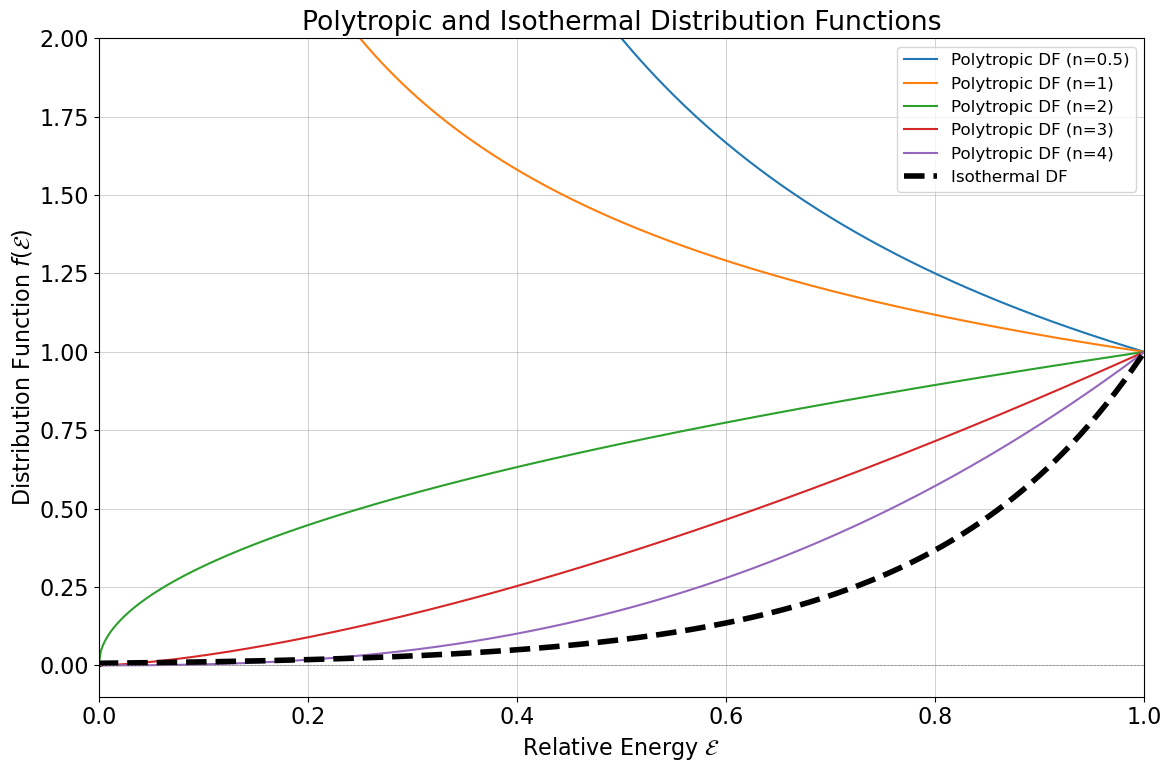

In [72]:
# Define the polytropic DF as a function of relative energy
def polytropic_df(eps, n):
    """
    Polytropic DF:
    f(eps) ~ eps^(n - 3/2) for eps > 0, and 0 otherwise.
    """
    df = np.zeros_like(eps)
    df[eps > 0] = eps[eps > 0]**(n - 1.5)
    return df

# Define the isothermal DF as a function of relative energy
def isothermal_df(eps, sigma2, match_value):
    """
    Isothermal DF:
    f(eps) ~ exp(eps / sigma^2), scaled to match value at eps=1.
    """
    df = np.zeros_like(eps)
    df[eps > 0] = np.exp(eps[eps > 0] / sigma2)
    # Normalize to match the polytropic DF at eps=1
    df /= np.exp(1 / sigma2)
    df *= match_value
    return df

# Define the range of relative energy (eps)
eps = np.linspace(0, 1, 500)  # Energy range 0 to 1

# Polytropic DFs for different values of n
n_values = [0.5, 1, 2, 3, 4]
df_at_eps_1 = {}  # Store values of DFs at eps=1 for scaling

plt.figure(figsize=(12, 8))

for n in n_values:
    df_poly = polytropic_df(eps, n)
    df_at_eps_1[n] = df_poly[-1]  # Value at eps=1
    plt.plot(eps, df_poly, label=f'Polytropic DF (n={n})')

# Isothermal DF
sigma2 = 0.2  # Velocity dispersion squared
match_value = df_at_eps_1[2]  # Match to n=2 polytropic DF at eps=1
df_iso = isothermal_df(eps, sigma2, match_value)
plt.plot(eps, df_iso, label='Isothermal DF', linestyle='--', color='black', linewidth=4)

# Plot formatting
plt.xlabel('Relative Energy $\mathcal{E}$')
plt.ylabel('Distribution Function $f(\mathcal{E})$')
plt.title('Polytropic and Isothermal Distribution Functions')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)  # Line at DF=0
plt.legend(fontsize=12)
plt.grid(visible=True, color='grey', alpha=0.5, linewidth=0.5)
plt.ylim(-0.1, 2)
plt.xlim(0, 1)

plt.savefig("../Figures/isothermal_and_polytropic_dfs.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()
